In [0]:
import torch
import torch.optim as optim
from torchvision import transforms, models

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [88]:
torch.cuda.is_available()

True

In [0]:
vgg_model = models.vgg19(pretrained=True).features
for parameter in vgg_model.parameters():
  parameter.requires_grad_(False)

In [90]:
vgg_model.to(torch.device('cuda'))

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [104]:
from google.colab import files
files.upload()

Saving goku.jpg to goku.jpg


{'goku.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 85\n\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x01\xf4\x03 \x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x01\x02\x04\x05\x06\x07\x08\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\xff\xda\x00\x0c\x03\

In [0]:
def image_format(img, maximum_size=300, image_shape=None):
  image = Image.open(img).convert('RGB')
  if max(image.size)>maximum_size:
    size = maximum_size
  else:
    size = max(image.size)
  if image_shape is not None:
    size = image_shape
  
  image_shape_tranform =transforms.Compose([transforms.Resize(size),transforms.ToTensor(),transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))])
  
  image = image_shape_tranform(image)[:3,:,:].unsqueeze(0)
  return image

In [0]:
content_image = image_format('content_image.jpg')
style_image = image_format('goku.jpg', image_shape=content_image.shape[-2:])

In [107]:
content_image

tensor([[[[ 0.2967,  0.3994,  0.2624,  ...,  1.0844,  1.2557,  1.2557],
          [ 0.3652,  0.3823,  0.3652,  ...,  1.0844,  1.2043,  1.2557],
          [ 0.2967,  0.2624,  0.2453,  ...,  1.0159,  1.0844,  1.2043],
          ...,
          [-1.1932, -1.2103, -1.1589,  ..., -1.1418, -1.1589, -1.1589],
          [-1.2788, -1.2788, -1.2617,  ..., -1.1075, -1.0904, -1.0904],
          [-1.4672, -1.4843, -1.4672,  ..., -1.0562, -1.0562, -1.0562]],

         [[ 0.7479,  0.9230,  0.8179,  ...,  1.4657,  1.5882,  1.5707],
          [ 0.8004,  0.8704,  0.9055,  ...,  1.4657,  1.5707,  1.6057],
          [ 0.6954,  0.7304,  0.7829,  ...,  1.3782,  1.4657,  1.5707],
          ...,
          [-0.7577, -0.7227, -0.6176,  ..., -0.4251, -0.4426, -0.4601],
          [-0.8277, -0.8102, -0.7577,  ..., -0.3725, -0.3725, -0.3725],
          [-1.0203, -1.0203, -0.9853,  ..., -0.3025, -0.3375, -0.3375]],

         [[ 0.2871,  0.2348, -0.0615,  ...,  0.9145,  1.0191,  0.9842],
          [ 0.3393,  0.2696,  

In [0]:
def un_normalize(image_tensor):
  image = image_tensor.to('cpu').clone().detach()
  image = image.numpy().squeeze()
  image = image.transpose(1,2,0)
  image = image* np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
  image = image.clip(0,1)
  return image

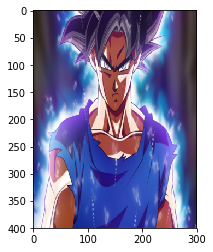

In [119]:
plt.imshow(un_normalize(style_image))

In [0]:
def gram_matrix(array_tensor):
  ar_size = array_tensor.size()
  depth, height, width = ar_size[1],ar_size[2],ar_size[3]
  
  tensor = array_tensor.view(depth, height*width)
  return (torch.mm(tensor, tensor.t()))

In [0]:
def feature_extract(image, model, layers=None):
  if layers is None:
    layers = {'0':'conv1_1','5':'conv2_1','10':'conv3_1','19':'conv4_1','21':'conv4_2','28':'conv5_1'}
  feature = {}
  x = image.to('cuda')
  for name, layer in model._modules.items():
    x = layer(x)
    if name in layers:
      feature[layers[name]] = x
  return feature

In [0]:
content_feature = feature_extract(content_image,vgg_model)
style_feature = feature_extract(style_image,vgg_model)
gram_style = {layer:gram_matrix(style_feature[layer]) for layer in style_feature}
target = content_image.clone().requires_grad_(True).to('cpu')

In [0]:
style_weights = {'conv1_1':1, 'conv2_1':0.75, 'conv3_1':0.2, 'conv4_1':0.2,'conv5_1':0.1}
alpha = 1
beta = 1e6

In [0]:
# content_feature

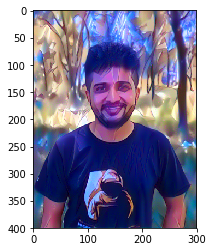

In [124]:
optimizer = optim.Adam([target], lr=0.003)
show_every = 1000
steps = 1000
for ind in range(1, steps+1):
  target_features = feature_extract(target, vgg_model)
  content_loss = torch.mean((target_features['conv4_2'] - content_feature['conv4_2']) **2)
  style_loss = 0
  
  for layer in style_weights:
    target_feature = target_features[layer]
    abc,depth,height,weight = target_feature.shape
    target_gram = gram_matrix(target_feature)
    style_gram = gram_style[layer]
    layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram) **2)
    style_loss += layer_style_loss / (depth*height*weight)
  
  total_loss = alpha*content_loss + beta*style_loss
  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()
  
  if ind % show_every == 0:
    plt.imshow(un_normalize(target))
    plt.show()

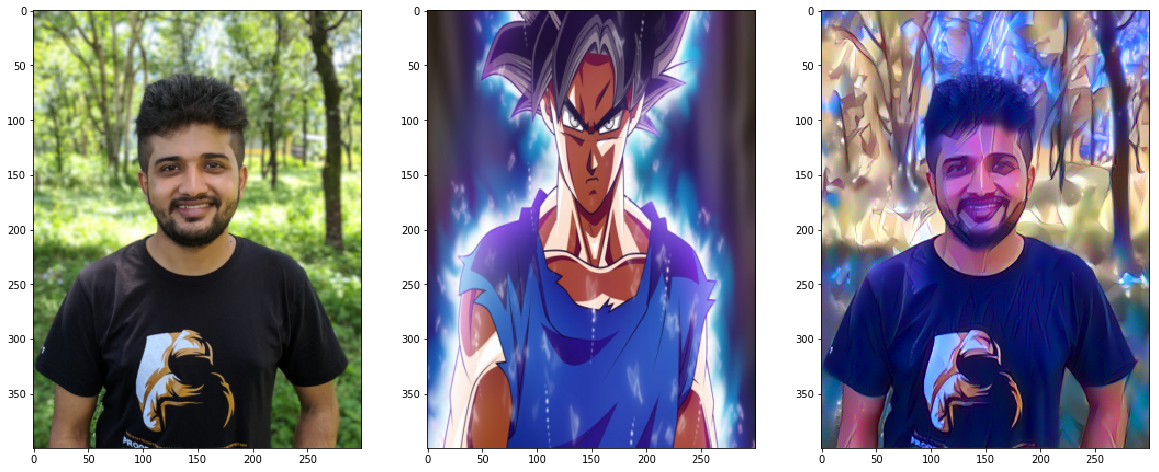

In [125]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(un_normalize(content_image))
ax2.imshow(un_normalize(style_image))
ax3.imshow(un_normalize(target))